# Newark Housing Prices Prediction

This is a linear regression project. Here, I will try to predict the housing prices of Newark using Linear Regression Model and see if it is a great fit. For the purpose of this project, I will assume any five input variables - property type, number of bedrooms, number of bathrooms, area of the house, and area of the lot.

In [2]:
#importing Packages

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,max_error,r2_score,explained_variance_score
import math

#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [31]:
# uploading dataset

df = pd.read_csv('newark-properties.csv')

In [32]:
# checking dataset
df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,429 S 12th St,Newark City,NJ,07103-1936,215000,3.0,1.5,...,Active,NaN,NaN,http://www.redfin.com/NJ/Newark/429-S-12th-St-...,GSMLS,3695675,N,Y,40.739158,-74.203270
1,MLS Listing,NaN,Multi-Family (2-4 Unit),525-527 Central Ave,Newark,NJ,07107,2300000,NaN,NaN,...,Active,NaN,NaN,http://www.redfin.com/NJ/Newark/525-Central-Av...,MOMLS,22106274,N,Y,40.749056,-74.195611
2,MLS Listing,NaN,Townhouse,16 Ashby Ln,Newark,NJ,07103,324900,2.0,2.5,...,Active,NaN,NaN,http://www.redfin.com/NJ/Newark/16-Ashby-Ln-07...,NJMLS,21007607,N,Y,40.741368,-74.184992
3,MLS Listing,NaN,Multi-Family (2-4 Unit),24 Dassing Ave,Newark,NJ,07106,399000,NaN,NaN,...,Active,NaN,NaN,http://www.redfin.com/NJ/Newark/24-Dassing-Ave...,BRIGHT MLS,NJES100262,N,Y,40.742447,-74.212636
4,MLS Listing,NaN,Multi-Family (2-4 Unit),41 Winans Ave,Newark,NJ,07108,430000,9.0,3.0,...,Active,March-6-2021 12:00 PM,March-6-2021 03:00 PM,http://www.redfin.com/NJ/Newark/41-Winans-Ave-...,NJMLS,21007594,N,Y,40.729617,-74.199142


In [33]:
#selecting only required columns and assigning its as new dataframe df1
col = ['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']
df1 = df[col]
df1.head()

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
0,Single Family Residential,215000,3.0,1.5,NaN,2613.0
1,Multi-Family (2-4 Unit),2300000,NaN,NaN,NaN,NaN
2,Townhouse,324900,2.0,2.5,1276.0,NaN
3,Multi-Family (2-4 Unit),399000,NaN,NaN,2459.0,2500.0
4,Multi-Family (2-4 Unit),430000,9.0,3.0,NaN,2370.0


<AxesSubplot:>

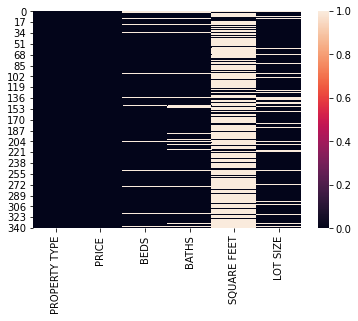

In [34]:
#checking missing values using heatmap
sns.heatmap(df1.isnull(),cbar=True)

<AxesSubplot:>

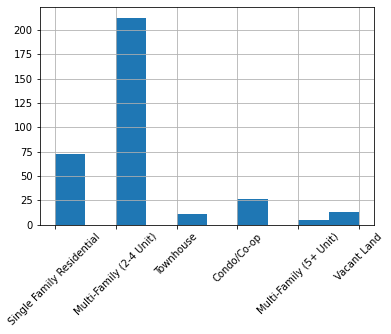

In [35]:
#Distribution by property type

df1['PROPERTY TYPE'].hist(xrot=45)


In [36]:
#dropping vacant land and multi-family records
df1['PROPERTY TYPE'].unique()


array(['Single Family Residential', 'Multi-Family (2-4 Unit)',
       'Townhouse', 'Condo/Co-op', 'Multi-Family (5+ Unit)',
       'Vacant Land'], dtype=object)

In [37]:
property_types_to_remove = ['Vacant Land','Multi-Family (5+ Unit)'] 
df1.drop(df1[df1['PROPERTY TYPE'].isin(property_types_to_remove)].index,inplace=True)

In [38]:
df1

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
0,Single Family Residential,215000,3.0,1.5,NaN,2613.0
1,Multi-Family (2-4 Unit),2300000,NaN,NaN,NaN,NaN
2,Townhouse,324900,2.0,2.5,1276.0,NaN
3,Multi-Family (2-4 Unit),399000,NaN,NaN,2459.0,2500.0
4,Multi-Family (2-4 Unit),430000,9.0,3.0,NaN,2370.0
...,...,...,...,...,...,...
335,Multi-Family (2-4 Unit),369000,6.0,3.0,NaN,3372.0
336,Multi-Family (2-4 Unit),129900,3.0,1.5,NaN,1808.0
337,Multi-Family (2-4 Unit),129900,3.0,1.5,NaN,1742.0
339,Multi-Family (2-4 Unit),450000,6.0,5.0,NaN,1742.0


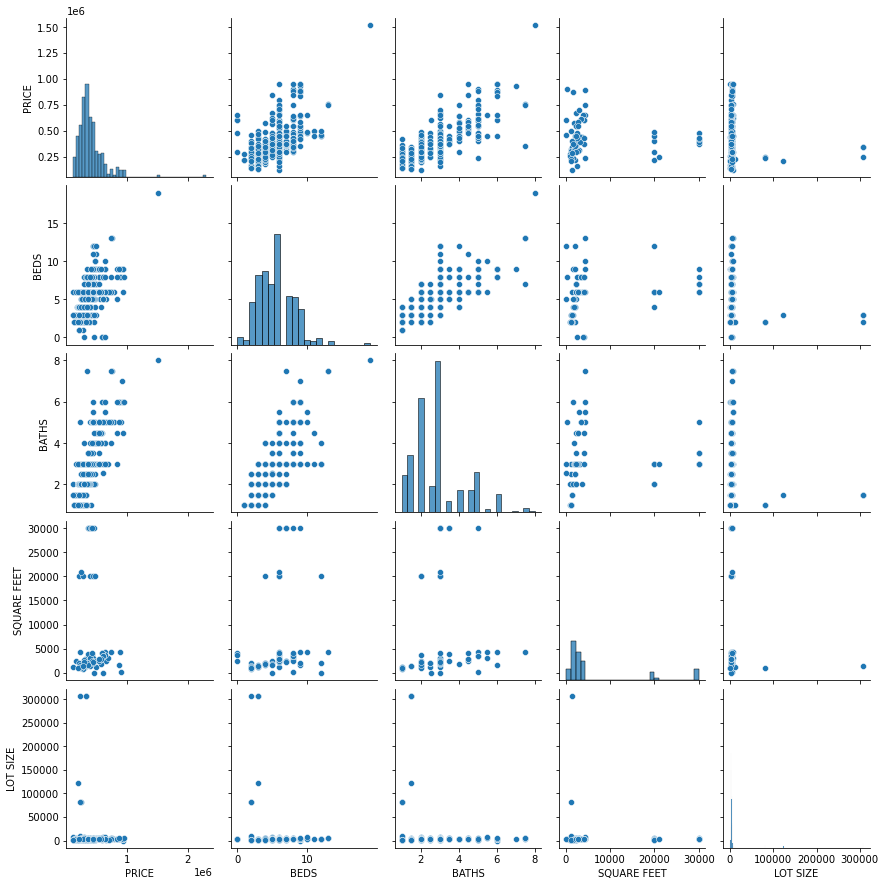

In [39]:
#pairplot visualizing relationships
sns.pairplot(df1)

From above relationship plots, we can see that number of beds and number of baths have direct/positive relationship with the price of the house. However, the relationship are not homoscedastic. They are rather heteroscedastic as the price does not changes uniformly (scatters variably). The area of the house (squarefeet) and lot size does not seem to impact the property prices. 

From above pairplot, we can also identify few outliers mainly in area (square feet) and lot size.


In [40]:
#removing outliers
df1.drop(df1[df1['SQUARE FEET']>5000].index,inplace=True)
df1.drop(df1[df1['LOT SIZE']>10000].index,inplace=True)

In [41]:
#describe dataset
df1.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,3.030000e+02,300.00000,295.000000,57.000000,266.000000
mean,4.145496e+05,5.45000,2.944237,2328.315789,3108.218045
std,2.127206e+05,2.51434,1.400662,1115.066080,1178.073127
min,1.250000e+05,0.00000,1.000000,1.000000,4.000000
25%,2.990000e+05,4.00000,2.000000,1555.000000,2500.000000
50%,3.650000e+05,5.00000,3.000000,2300.000000,2894.500000
75%,4.774500e+05,7.00000,3.500000,3000.000000,3892.250000
max,2.300000e+06,19.00000,8.000000,4400.000000,7405.000000


In [42]:
# We can see that we have 1 in squarefeet and 4 in lot size which is impossible. So, we will also drop those entires
df1.drop(df1[df1['SQUARE FEET']<5].index,inplace=True)
df1.drop(df1[df1['LOT SIZE']<5].index,inplace=True)

In [43]:
df1.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,3.000000e+02,297.000000,292.000000,55.000000,264.000000
mean,4.119718e+05,5.417508,2.934932,2412.909091,3121.852273
std,2.112084e+05,2.489321,1.396195,1040.047885,1166.469815
min,1.250000e+05,0.000000,1.000000,198.000000,435.000000
25%,2.990000e+05,4.000000,2.000000,1682.500000,2500.000000
50%,3.624495e+05,5.000000,3.000000,2360.000000,2920.500000
75%,4.750000e+05,7.000000,3.500000,3000.000000,3902.250000
max,2.300000e+06,19.000000,8.000000,4400.000000,7405.000000


In [44]:
#mean imputing missing values
imputed_df1=df1.fillna(df1.mean())

In [45]:
#checking imputed dataset
imputed_df1.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,3.000000e+02,300.000000,300.000000,300.000000,300.000000
mean,4.119718e+05,5.417508,2.934932,2412.909091,3121.852273
std,2.112084e+05,2.476801,1.377390,441.992216,1093.996129
min,1.250000e+05,0.000000,1.000000,198.000000,435.000000
25%,2.990000e+05,4.000000,2.000000,2412.909091,2500.000000
50%,3.624495e+05,5.208754,3.000000,2412.909091,3090.500000
75%,4.750000e+05,7.000000,3.000000,2412.909091,3613.250000
max,2.300000e+06,19.000000,8.000000,4400.000000,7405.000000


### Linear Regression

To begin with, I will split data into 70% training and 30% testing dataset. After that, I wil build a linear model and test the model using the 30% dataset.

I will be using Sci-kit learn ML library to split the dataset, build the model, and test the model.
1. from sklearn.model_selection import train_test_split: *to split our data into 70% training & 30% testing datasets*
2. from sklearn.linear_model import LinearRegression: *to build linear regression model using the training dataset*
3. from sklearn.metrics import mean_absolute_error,mean_squared_error,max_error,r2_score,explained_variance_score: *to test the model with remaining 30% data*

In [47]:
#assigning input variables
predictors= list(imputed_df1.columns)
predictors.remove('PRICE')
predictors

['PROPERTY TYPE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']

In [48]:
#splitting data into testing and training set
X=pd.get_dummies(imputed_df1[predictors],drop_first=True)
y=imputed_df1['PRICE']

train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.3,random_state=1)

In [49]:
re_prices=LinearRegression()
re_prices.fit(train_X,train_y)

LinearRegression()

In [50]:
X.columns

Index(['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'PROPERTY TYPE_Multi-Family (2-4 Unit)',
       'PROPERTY TYPE_Single Family Residential', 'PROPERTY TYPE_Townhouse'],
      dtype='object')

In [51]:
#reg eqn: PRICE = intercept + c1*BEDS + c2*BATHS +....+ c6*PROPERTY TYPE_Single Family Residential + c7*PROPERTY TYPE_Townhouse
#regression intercept

re_prices.intercept_

173560.91872302117

In [52]:
#regression coefficients
re_prices.coef_

array([ 6.17223586e+03,  9.10981106e+04, -1.49575355e+01, -2.25635249e+00,
        7.79672544e+02, -5.85500485e+04, -7.06025541e+04])

In [54]:
train_X.head()

,BEDS,BATHS,SQUARE FEET,LOT SIZE,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
287,6.0,4.5,2400.000000,2613.000000,1,0,0
22,4.0,3.0,2412.909091,3121.852273,1,0,0
16,8.0,3.0,2412.909091,4791.000000,1,0,0
99,9.0,4.0,2412.909091,2849.000000,1,0,0
336,3.0,1.5,2412.909091,1808.000000,1,0,0


In [55]:
#predicted prices
pred_y = re_prices.predict(valid_X)

In [56]:
#comparing predicted vs actual prices metrics
print('Regression model performance evaluation')
print('R2: ',r2_score(valid_y,pred_y))
print('MAE: ',mean_absolute_error(valid_y,pred_y))
print('RMSE: ',math.sqrt(mean_squared_error(valid_y,pred_y)))
print('Max error: ',max_error(valid_y,pred_y))

Regression model performance evaluation
R2:  0.5668494181523474
MAE:  77974.30584250801
RMSE:  103666.96463737704
Max error:  414456.20302862173


From above evaluation, the model is highly unlikely to be used by practitioners. Our model has coefficient of determination(R^2 score) of 0.567, which means our predicted prices is only 56.7% close to the actual listing prices.

Our model has mean absolute error of 77,074.31, which means the predicted prices were off in average by `$`77,074.31. (either more or less). Also the max error tells us that the maximum predicted price off in the listings was $414,456.20.